In [2]:
from __future__ import annotations

import numpy as np
import pandas as pd
import seaborn as sns

from typing import *

sns.set(style="darkgrid")

In [3]:
from nepal.datasets import NYTimes, PopulationDensity
from nepal.ml.features.preprocess import Cases, Population
from nepal.ml.transformers import log_transformer

df: pd.DataFrame = Cases(NYTimes()).preprocessed()

df_y: pd.DataFrame = log_transformer.transform(df[["new_cases"]])
df_y

new_cases
fips  date                 
01001 2020-01-21   0.000000
      2020-01-22   0.000000
      2020-01-23   0.000000
      2020-01-24   0.000000
      2020-01-25   0.000000
...                     ...
78030 2022-04-07   2.371578
      2022-04-08   2.448539
      2022-04-09   2.448539
      2022-04-10   2.448539
      2022-04-11   2.448539

[2614640 rows x 1 columns]

In [14]:
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

t = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
Xt = t.fit_transform(df_y)
Xt.head()

Feature Extraction: 100%|██████████| 3220/3220 [10:52<00:00,  4.93it/s] 


,new_cases__variance_larger_than_standard_deviation,new_cases__has_duplicate_max,new_cases__has_duplicate_min,new_cases__has_duplicate,new_cases__sum_values,new_cases__abs_energy,new_cases__mean_abs_change,new_cases__mean_change,new_cases__mean_second_derivative_central,new_cases__median,...,new_cases__permutation_entropy__dimension_6__tau_1,new_cases__permutation_entropy__dimension_7__tau_1,new_cases__query_similarity_count__query_None__threshold_0.0,"new_cases__matrix_profile__feature_""min""__threshold_0.98","new_cases__matrix_profile__feature_""max""__threshold_0.98","new_cases__matrix_profile__feature_""mean""__threshold_0.98","new_cases__matrix_profile__feature_""median""__threshold_0.98","new_cases__matrix_profile__feature_""25""__threshold_0.98","new_cases__matrix_profile__feature_""75""__threshold_0.98",new_cases__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,1.0,1.0,1965.658555,5848.800358,0.103804,0.002748,-0.000214,2.548313,...,4.937155,5.587697,0.0,1.312821,8.944272,3.281914,3.086989,2.483485,3.782827,5.350930
1,1.0,0.0,1.0,1.0,2711.610267,10932.099434,0.088577,0.002924,-0.000008,3.417724,...,4.617626,5.269928,0.0,1.959706,10.232704,4.167542,3.094702,2.434011,5.382385,6.320284
2,0.0,0.0,1.0,1.0,1289.675009,2809.868045,0.097002,0.000310,0.000000,1.637609,...,4.829802,5.482949,0.0,1.403123,9.797959,3.823149,3.592543,2.590015,4.688369,4.134148
3,1.0,0.0,1.0,1.0,1319.614006,3018.577569,0.096448,0.000763,0.000049,1.550597,...,4.707656,5.336692,0.0,1.598306,10.000000,3.692975,3.629675,2.627211,4.461436,4.318729
4,1.0,0.0,1.0,1.0,1893.894736,5678.045337,0.096149,0.002118,0.000067,2.537076,...,4.658065,5.316046,0.0,1.446642,10.000000,3.628260,3.417006,2.293171,4.614063,4.890497


In [15]:
len(Xt)

3220

In [16]:
from sktime.transformations.series.detrend import Deseasonalizer

transformer = Deseasonalizer()
y_hat = transformer.fit_transform(df_y)

<AxesSubplot:xlabel='fips,date'>

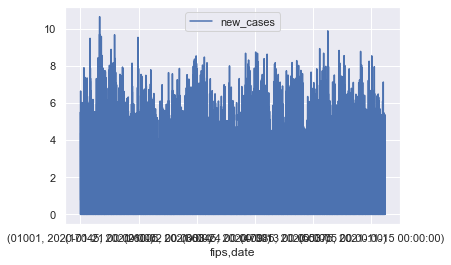

In [18]:
y_hat.plot()

In [23]:
transformer

AttributeError: 'Deseasonalizer' object has no attribute '_seasonal'